## Chapter 10: Rootfinding

A **root** of a function $f(x)$ is a number $x^{\star}$ such that $f(x^{\star})=0$.

For example, if $f(x)=x^2-4x+3$, then $x=1$ is a root because $f(1)=0$

With some functions (linear, quadratic), we can find the roots using standard mathematical techniques, however, in many cases, say if $g(x) = x \cos x$, we can't. 

This chapter goes over approximations to roots, errors and how to find roots.

### 10.1 Absolute and Relative Errors

Consider some algorithm tries to find the value $x^{\star}$.  If the actual value that the algorithm returns is $x$, there there is an error.  The **absolute error** is defined as

$$|x-x^{\star}$$

and the **relative error** is 

$$\left|\frac{x-x^{\star}}{x^{\star}}\right|$$

Also, the **percent error** is often used as well and it is the relative error times 100.

Consider the example if $x^{\star} = 0.150$ and $x=0.153$, find the absolute, relative and percent error.

In [1]:
xstar = 0.150
x = 0.153
abs(x-xstar)

0.0030000000000000027

In [2]:
abs((x-xstar)/xstar)

0.020000000000000018

In [3]:
100*abs((x-xstar)/xstar)

2.0000000000000018

To simplify things in this chapter we will define:

In [4]:
absErr(x::Real,xstar::Real) = abs(x-xstar) 
relErr(x::Real,xstar::Real) = abs((x-xstar)/xstar)

relErr (generic function with 1 method)

In [5]:
absErr(0.153,0.15)

0.0030000000000000027

In [6]:
relErr(0.153,0.15)

0.020000000000000018

In [7]:
100*relErr(0.153,0.15)

2.0000000000000018

### 10.2 Errors in the Quadratic Formula

Consider a quadratic function $q(x)=ax^2+bx+c$, we know that the quadratic formula:

$$x=\frac{-b \pm \sqrt{b^{2}-4ac} } {2a}$$

returns the roots of $q(x)$

A simple function that solves this is:

In [8]:
function quad(a::Real,b::Real,c::Real)
  d=sqrt(b^2-4*a*c)
  (-b+d)/(2*a),(-b-d)/(2*a)
end

quad (generic function with 1 method)

Let's use this to solve $12.242x^2+42.382x+0.0012=0$ using the quadratic formula

In [9]:
x64a,x64b = quad(12.24,42.382,0.12)

(-0.002833709737840446, -3.4597479896085646)

If instead we used 16-bit floating point numbers then

In [10]:
x16a,x16b = quad(Float16(12.24),Float16(42.382),Float16(0.12))

(Float16(-0.002552), Float16(-3.459))

If we assume that 64-bit roots are exact and the 16-bit roots are approximations, then the absolute errors are:

In [11]:
absErr(x16a,x64a),absErr(x16b,x64b)

(0.0002816772671373211, 0.0007636146085645557)

And the relative errors are:

In [12]:
relErr(x16a,x64a),relErr(x16b,x64b)

(0.0994023005870692, 0.00022071393952914788)

Although these don't seem like much of an error, the percent error on the first one would be nearly 10% which is quite large.

What happened?   In the example of the quadratic formula: $12.242x^2+42.382x+0.0012=0$, then $b=42.382$ and $\sqrt{b^2-4ac}$ is

In [13]:
sqrt(42.382^2-4*0.0012*12.242)

42.38130675663505

Is very close to $b$ so we they are subtracted you get round off.

### 10.3: Revisting the Quadratic Equation

Does the above example mean that we can't use the quadratic equation?  Well, no.  Here's how we can rewrite the quadratic.

Assume that $b>0$, then root from the quadratic formula that is most problematic is:

$$\frac{-b+\sqrt{b^2-4ac}}{2a}$$

We can rearrange this to switch to an addition problem.

In [14]:
function quad2(a::Real,b::Real,c::Real)
  d=sqrt(b^2-4*a*c)
  return -2c/(b+d),-2c/(b-d)
end

quad2 (generic function with 1 method)

In [15]:
x64c,x64d = quad2(12.24,42.382,0.12)

(-0.002833709737840375, -3.459747989608478)

In [16]:
x16c,x16d = quad2(Float16(12.24),Float16(42.382),Float16(0.12))

(Float16(-0.002834), Float16(-3.84))

In [17]:
absErr(x16c,x64c),absErr(x16d,x64d)

(6.103305190000366e-7, 0.38009576039152204)

In [18]:
relErr(x16c,x64c),relErr(x16d,x64d)

(0.00021538215818292712, 0.10986226786839914)

Note that the first solution is quite close, but this time the second one has error of about 11%.

In your homework, you will write a function that chooses which of the two quadratic formulas to select to get a good result.

### Searching for roots of functions that are hard to find:

In [19]:
using Plots

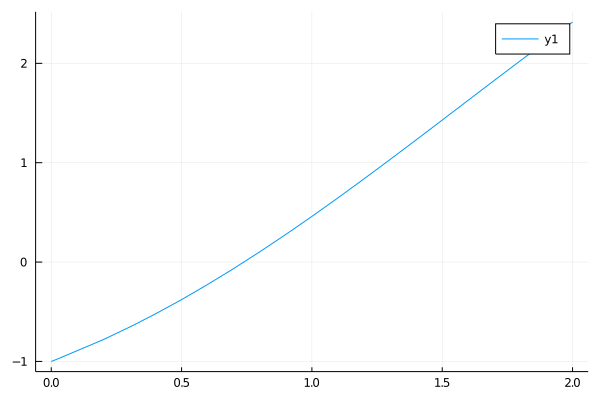

In [20]:
plot(x->x-cos(x),0,2)

In [22]:
function bisect(f::Function,a::Real,b::Real)
  local mid = 0.5*(a+b)  # find the midpoint
  if abs(b-a)<1e-6
    return mid
  elseif f(a)*f(mid)<0
    return bisect(f,a,mid)
  else
    return bisect(f,mid,b)
  end
end

bisect (generic function with 1 method)

In [23]:
bisect(x->x-cos(x),0,2)

0.7390847206115723

### 10.4: Newton's method

Newton's method is a common method used to find roots of equations.  You probably saw Newton's method in Calculus and the idea is to approximate the root by using the tangent line (and finding the root).  This is repeatedly done.  In short, this results in the following iterative formula:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

We can write this as a julia function with:

In [24]:
function newton(f::Function, df::Function, x0::Real)
  local dx=f(x0)/df(x0)
  while abs(dx)>1e-6
    x0 = x0-dx
    dx = f(x0)/df(x0)
  end
  x0  
end

newton (generic function with 1 method)

In [25]:
newton(x->15x^3-143x^2+226x+280,x->45x^2-286x+226,0)

-0.8000005020976213

In [26]:
bisect(x->15x^3-143x^2+226x+280,-1,0)

-0.7999997138977051

### 10.4.2: Automatic Differentiation

It's a bit of a pain to have to put in the derivative as well.  Fortunately, there is a nice technique called **automatic differentiation** to find the exact value of derivative at a point.  It's not symbolic differentiation, which would generate a function, but it works perfectly for Newton's method.  Here's how this works. 

First, add the `ForwardDiff` package if you haven't

In [27]:
using ForwardDiff

In [28]:
ForwardDiff.derivative(x->x^2,3)

6

In [29]:
f(x)=exp(x^2+cos(sqrt(x)))

f (generic function with 1 method)

In [34]:
ForwardDiff.derivative(f,0.5)

1.4847374790394043

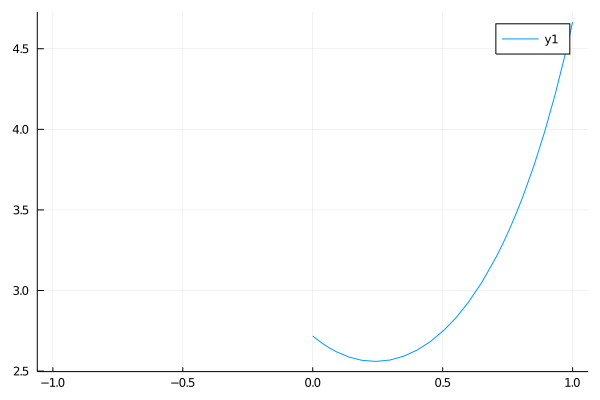

In [35]:
plot(f,-1,1)

### Adding Automatic Differentiation to Newton's method

In [37]:
function newton(f::Function, x0::Real)
  local xstep = f(x0)/ForwardDiff.derivative(f,x0) 
  while abs(xstep)>1e-6
    x0 = x0 - xstep
    xstep = f(x0)/ForwardDiff.derivative(f,x0)
  end
  x0
end

newton (generic function with 2 methods)

Find all three roots of

In [39]:
f(x)=15x^3-143x^2+226x+280

f (generic function with 1 method)

Run Newton's method on $f(x)=x^2+2$.  What happened?

In [43]:
function newton2(f::Function, x0::Real)
  local xstep = f(x0)/ForwardDiff.derivative(f,x0)
  local steps = 0
  while abs(xstep)>1e-6 && steps<10
    x0 = x0 - xstep
    xstep = f(x0)/ForwardDiff.derivative(f,x0)
    steps += 1
  end
  x0
end

newton2 (generic function with 1 method)

In [45]:
newton2(x->x^2+2,0.1)

-45.924549552528404